## Exercise 1

In [1]:
def temp_tester(normal_temp):
    def test_temp(temp):
        return abs(temp - normal_temp) <= 1
    return test_temp

In [2]:
human_tester = temp_tester(37)
chicken_tester = temp_tester(41.1)

print(chicken_tester(42))
print(human_tester(42))
print(chicken_tester(43))
print(human_tester(35))
print(human_tester(98.5))

True
False
False
False
False


## Exercise 2

### 2a

In [1]:
import pandas as pd
data = pd.read_csv("us-states.csv")
data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485


### 2b

In [4]:
import matplotlib.pyplot as plt
##New case count
def calculate_new_cases(df):
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(['state', 'date'])
    df['new_cases'] = df.groupby('state')['cases'].diff().fillna(0)
    return df


def plot_new_cases(states):
    df = calculate_new_cases(data)
    plt.figure(figsize=(10,6))
    for state in states:
        state_data = df[df['state'] == state]
        plt.plot(state_data['date'], state_data['new_cases'], label=state)
    
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('New Cases', fontsize=12)
    plt.title('New COVID-19 Cases Over Time', fontsize=14)
    plt.legend(title="States")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

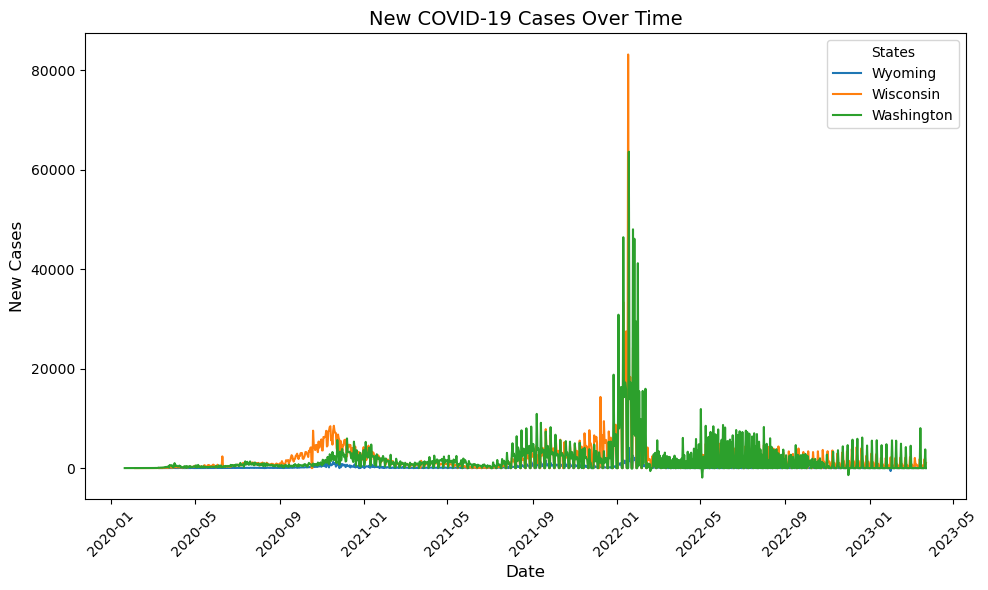

In [6]:
list = ['Wyoming','Wisconsin','Washington']

plot_new_cases(list)

### 2c

In [9]:
def find_peak_case_date(state):
    df = calculate_new_cases(data)
    state_data = df[df['state'] == state]
    peak_row = state_data.loc[state_data['new_cases'].idxmax()]
    return peak_row['date']




In [10]:
find_peak_case_date("Washington")

Timestamp('2022-01-18 00:00:00')

### 2d

In [17]:
def compare_peak_cases(state1, state2):
    date1= find_peak_case_date(state1)
    date2= find_peak_case_date(state2)
    
    if date1 < date2:
        result = f"{state1} reached its peak first."
    else:
        result = f"{state2} reached its peak first."
    
    days_between_peaks = abs((date1 - date2).days)
    return result, days_between_peaks

In [19]:
comparison = compare_peak_cases('New York', 'Washington')
comparison

('New York reached its peak first.', 10)

### 2e

In [51]:
Florida_data=data[data['state']=='Florida']
Florida_data

,date,state,fips,cases,deaths
242,2020-03-01,Florida,12,2,0
255,2020-03-02,Florida,12,2,0
270,2020-03-03,Florida,12,3,0
286,2020-03-04,Florida,12,3,0
304,2020-03-05,Florida,12,4,0
...,...,...,...,...,...
61672,2023-03-19,Florida,12,7542869,87141
61728,2023-03-20,Florida,12,7542869,87141
61784,2023-03-21,Florida,12,7542869,87141
61840,2023-03-22,Florida,12,7542869,87141


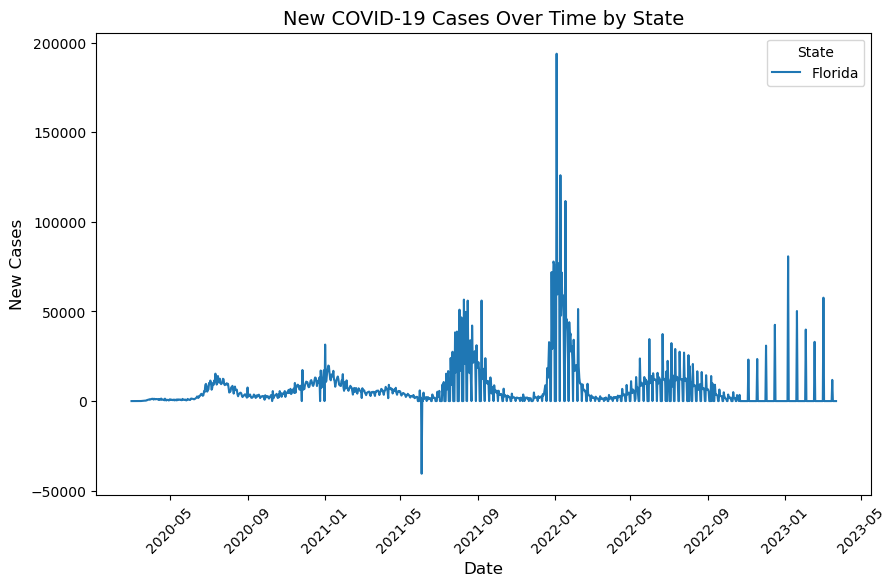

In [52]:
plot_new_cases(Florida_data, ['Florida'])

## Exercise 3

In [103]:
import pandas as pd
import sqlite3

with sqlite3.connect("hw0-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

In [104]:
data

,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown
...,...,...,...,...
152356,John Fowler,23.930833,71.532569,blue
152357,Diana Shuffler,21.884819,67.936753,brown
152358,Kevin Cuningham,87.705907,60.074646,brown
152359,James Libengood,21.727666,81.774985,brown


Mean: 39.51052792739697
Standard Deviation: 24.152760068601445
Minimum Age: 0.0007476719217636152
Maximum Age: 99.99154733076972


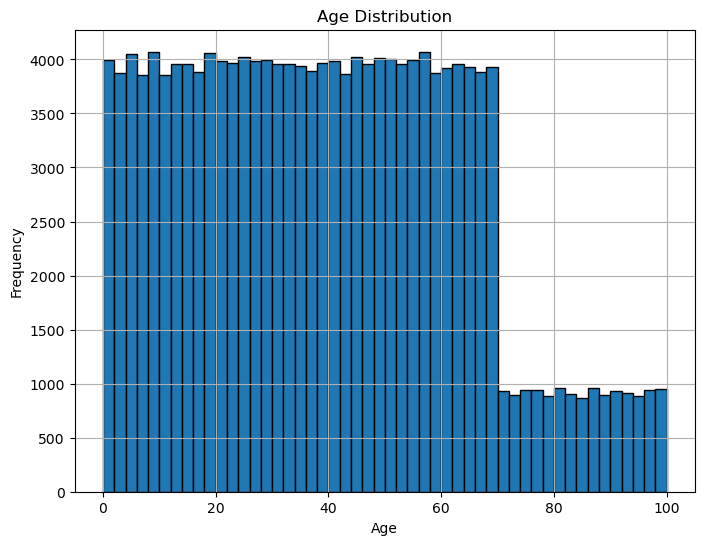

In [105]:
import matplotlib.pyplot as plt

# Compute the statistics for the age column
def compute_age_statistics(data):
    age_mean = data['age'].mean()
    age_std = data['age'].std()
    age_min = data['age'].min()
    age_max = data['age'].max()
    
    print(f"Mean: {age_mean}")
    print(f"Standard Deviation: {age_std}")
    print(f"Minimum Age: {age_min}")
    print(f"Maximum Age: {age_max}")

    return age_mean, age_std, age_min, age_max

# Plot a histogram of the age distribution
def plot_age_histogram(data, bins=10):
    plt.figure(figsize=(8, 6))
    plt.hist(data['age'], bins=bins, edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

compute_age_statistics(data)
plot_age_histogram(data, bins=50)

Mean: 60.884134159929715
Standard Deviation: 18.411824265661494
Minimum weight: 3.3820836824389326
Maximum weight: 100.43579300336947


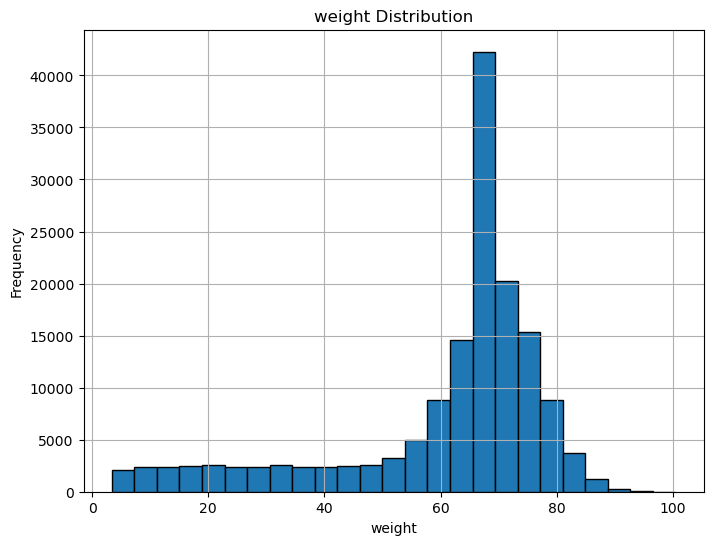

In [71]:
import matplotlib.pyplot as plt

# Compute the statistics for the age column
def compute_weight_statistics(data):
    weight_mean = data['weight'].mean()
    weight_std = data['weight'].std()
    weight_min = data['weight'].min()
    weight_max = data['weight'].max()
    
    print(f"Mean: {weight_mean}")
    print(f"Standard Deviation: {weight_std}")
    print(f"Minimum weight: {weight_min}")
    print(f"Maximum weight: {weight_max}")

    return weight_mean, weight_std, weight_min, weight_max

# Plot
def plot_weight_histogram(data, bins=10):
    plt.figure(figsize=(8, 6))
    plt.hist(data['weight'], bins=bins, edgecolor='black')
    plt.title('weight Distribution')
    plt.xlabel('weight')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

compute_weight_statistics(data)
plot_weight_histogram(data, bins=25)

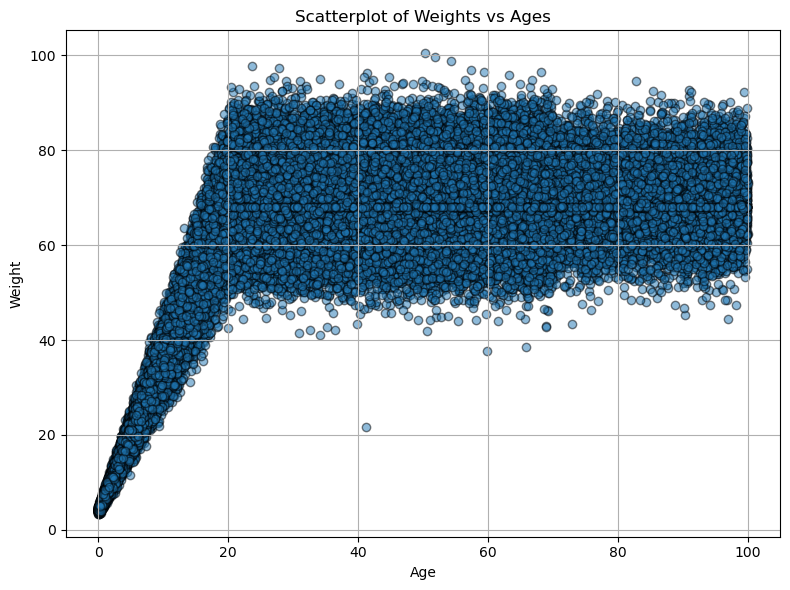

In [72]:
import matplotlib.pyplot as plt

# Scatterplot of weights vs ages
def plot_weights_vs_ages(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['age'], data['weight'], alpha=0.5, edgecolor='black')
    plt.title('Scatterplot of Weights vs Ages')
    plt.xlabel('Age')
    plt.ylabel('Weight')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_weights_vs_ages(data)

In [39]:
def find_outlier_person(data):
    # Filter the data based on age and weight range
    result = data[(data['age'] > 40) & (data['weight'] < 25)]
    
    if not result.empty:
        print(result[['name', 'age', 'weight']])
    return result['name']

find_outlier_person(data)

NameError: name 'data' is not defined

## Exercise 4

### 4a

In [1]:
import random

def generate_population(n, d):
    population = [True] * d + [False] * (n - d)
    random.shuffle(population)
    return population



### 4b

In [2]:
def randomize_protocal(population,s):
    sample = random.sample(population,s)
    responses = []
    for i in sample:
        flip = random.random()
        if flip>=0.5:
            flip = random.random()
            responses.append(flip >= 0.5)
        else:
            responses.append(i)
    return responses


### 4c

### Intuitive Idea

In [3]:
def estimate_drug_users(n, d, s):
    """
    Parameters:
    - n: total population size.
    - d: true number of drug users.
    - s: sample size.
    """
    population = generate_population(n, d)
    responses = randomize_protocal(population,s)
    
    true_responses_count = sum(responses)
    adjusted_true_count = (true_responses_count - 0.25 * s) / 0.5
    if adjusted_true_count < 0:
        adjusted_true_count = 0
    proportion_true_responses = adjusted_true_count / s
    estimated_drug_users = proportion_true_responses * n
    
    
    return round(estimated_drug_users)


### Bayesian Idea (This is the one discussed with Professor and TFs, I am not sure whether this idea matches the intrinsic logic of this question scenario or not. I put it here just for sharing)

The later answers below are all according to my first intuitive yet straight-forward idea

In [17]:
from scipy.stats import beta

def estimate_drug_users_bayesian(total_population, true_drug_users, sample_size):
    population = generate_population(total_population, true_drug_users)
    responses = randomize_protocal(population, sample_size)
    true_count = sum(responses)##Number of True in responses
    ## Adjust the count regarding the possibility of randomized answer, and do standardization
    adjusted_true_count = (true_count - 0.25 * sample_size) / 0.5
    alpha_prior=true_count
    beta_prior=sample_size-true_count
    #Beta Distribution, recalculate the posterior based on the likelihood estimation
    #We assume the likelihood is the observation in our trial
    #alpha_posterior = alpha_prior + max(adjusted_true_count, 0)  
    #beta_posterior = beta_prior + sample_size - max(adjusted_true_count, 0)
    alpha_posterior = round(alpha_prior * adjusted_true_count)
    beta_posterior = sample_size - alpha_posterior
    # Posterior distribution
    #posterior_dist = beta(alpha_posterior, beta_posterior)
    #estimated_proportion = posterior_dist.mean()
# Update posterior based on the adjusted true count
    alpha_posterior = alpha_prior + max(adjusted_true_count, 0)
    beta_posterior = beta_prior + (sample_size - max(adjusted_true_count, 0))
    
    # Posterior distribution
    posterior_dist = beta(alpha_posterior, beta_posterior)
    estimated_proportion = posterior_dist.mean()
    
    # Estimated number of drug users
    estimated_drug_users = estimated_proportion * total_population
    
    return round(estimated_drug_users)


    
    


### 4d

In [54]:
total_population = 1000
true_drug_users = 100
sample_size = 50

estimated_drug_users = estimate_drug_users(total_population, true_drug_users, sample_size)
estimated_drug_users


220

### 4e

In [56]:
n = 1000            
d = 100              
sample_size = 50 
num_experiments = 10000

    

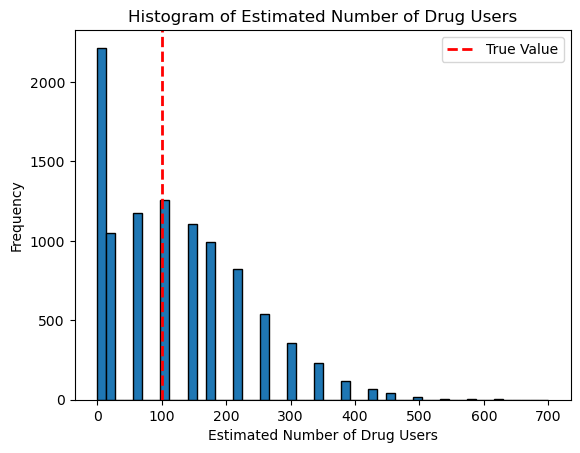

In [57]:
import matplotlib.pyplot as plt
estimates = []
for _ in range(num_experiments):
    estimated = estimate_drug_users(n, d, sample_size)
    estimates.append(estimated)

# Plotting the histogram
plt.hist(estimates, bins=50, edgecolor='black')
plt.title('Histogram of Estimated Number of Drug Users')
plt.xlabel('Estimated Number of Drug Users')
plt.ylabel('Frequency')
plt.axvline(x=d, color='red', linestyle='dashed', linewidth=2, label='True Value')
plt.legend()
plt.show()

In [58]:
from scipy.stats import norm
import numpy as np
mean_estimate = np.mean(estimates)
variance_estimate = np.var(estimates)
print(mean_estimate,variance_estimate)

116.466 11654.270844


In [31]:
import numpy as np
def simulate_estimates(n, d, s_range, num_simulations=100):
    """
    Parameters:
    - n: total population size.
    - d: true number of drug users.
    - s_range: list of sample sizes to test.
    - num_simulations: number of simulations to run for each sample size.
    """
    mean_estimates = []
    std_estimates = []
    
    for s in s_range:
        estimates = []
        for _ in range(num_simulations):
            estimate = estimate_drug_users(n, d, s)
            estimates.append(estimate)
        
        mean_estimates.append(np.mean(estimates))
        std_estimates.append(np.std(estimates))
    
    return mean_estimates, std_estimates


In [32]:
n = 1000  # Total population
d1 = 100
d2 = 500
s_range = range(10, 1001, 10)  # Sample sizes with margin = 10

mean_estimates_1, std_estimates_1 = simulate_estimates(n, d1, s_range)
mean_estimates_2, std_estimates_2 = simulate_estimates(n, d2, s_range)

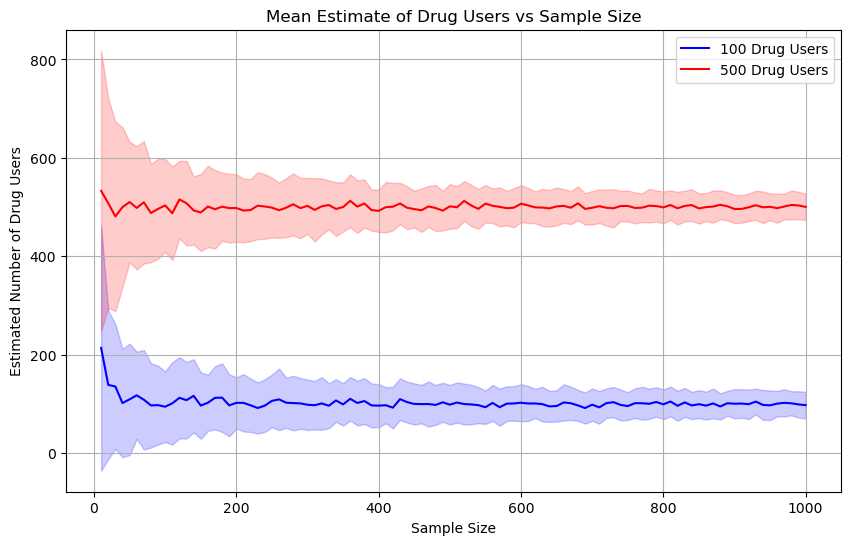

In [28]:
# Create the plot
plt.figure(figsize=(10, 6))

# Population with 100 drug users
plt.plot(s_range, mean_estimates_1, label='100 Drug Users', color='blue')
plt.fill_between(s_range, 
                 np.array(mean_estimates_1) - np.array(std_estimates_1), 
                 np.array(mean_estimates_1) + np.array(std_estimates_1), 
                 color='blue', alpha=0.2)

# Population with 500 drug users
plt.plot(s_range, mean_estimates_2, label='500 Drug Users', color='red')
plt.fill_between(s_range, 
                 np.array(mean_estimates_2) - np.array(std_estimates_2), 
                 np.array(mean_estimates_2) + np.array(std_estimates_2), 
                 color='red', alpha=0.2)

plt.title('Mean Estimate of Drug Users vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Number of Drug Users')
plt.legend()
plt.grid(True)
plt.show()
